    Importando Tabela

In [10]:
import pandas as pd
import numpy as np

tabela = pd.read_csv('amazon.csv')
display(tabela)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [43]:
# Tratando a coluna 'actual_price' mudando de string para float
# tabela['actual_price'] = tabela['actual_price'].str.replace('₹', '').str.replace(',','').astype(float)
tabela['actual_price'] = tabela['actual_price'].apply(lambda x: float(str(x).replace('₹', '').replace(',', '')))

# Taxa de cambio
taxa_de_cambio = 0.0713

# Calculando a coluna 'actual_price_brl' usando a taxa de cambio
tabela['actual_price_brl'] = tabela['actual_price'] * taxa_de_cambio

tabela = tabela[['actual_price', 'actual_price_brl']]

def color_linha(val):
    if val <= 50:
        return 'background-color: lightgreen'
    elif 50 < val <= 500:
        return 'background-color: mediumseagreen'
    else:
        return 'background-color: darkgreen'

style_tabela = tabela.style.applymap(color_linha, subset=['actual_price_brl'])

#style_tabela

In [36]:
produtos_50 = tabela[tabela['actual_price_brl'] <= 50]
produtos_50 = len(produtos_50)

produtos_50_a_500 = tabela[(tabela['actual_price_brl'] > 50) & (tabela['actual_price_brl'] <= 500)]
produtos_50_a_500 = len(produtos_50_a_500)

produtos_500 = tabela[tabela['actual_price_brl'] > 500]
produtos_500 = len(produtos_500)
                      
print(f'Produtos com valor ate 50BRL: {produtos_50}.')
print(f'produtos com o valor de 50BRL até 500BRL: {produtos_50_a_500}')
print(f'Produtos com valor acima 500BRL: {produtos_500}.')
#print(produtos_50 + produtos_500 + produtos_50_a_500)



Produtos com valor ate 50BRL: 322.
produtos com o valor de 50BRL até 500BRL: 882
Produtos com valor acima 500BRL: 261.


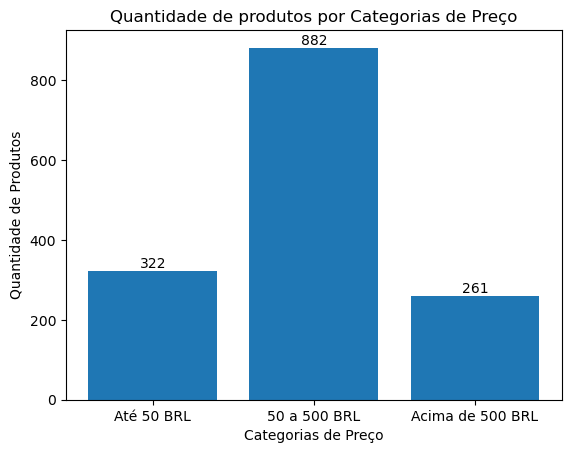

In [42]:
import matplotlib.pyplot as plt
# Vaamos criar o grafico dos valores até 50, de 50 a 500 e 500+

quantidade_ate_50 = produtos_50
quantidade_50_a_500 = produtos_50_a_500
quantidade_acima_de_500 = produtos_500

categorias = ['Até 50 BRL', '50 a 500 BRL', 'Acima de 500 BRL']
quantidades = [quantidade_ate_50, quantidade_50_a_500, quantidade_acima_de_500]

#Adiciona rotulos as barras

for i in range(len(categorias)):
    plt.text(categorias[i], quantidades[i], str(quantidades[i]), ha='center', va='bottom')

plt.bar(categoriaas, quantidades)
plt.xlabel('Categorias de Preço')
plt.ylabel('Quantidade de Produtos')
plt.title('Quantidade de produtos por Categorias de Preço')
plt.show()